In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'Inflation')

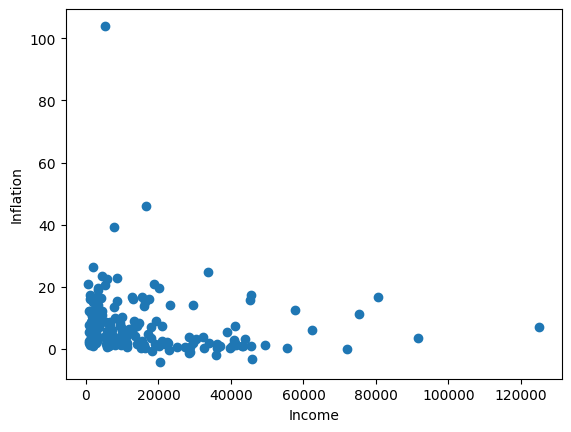

In [6]:
plt.scatter(
  x = df['income'],
  y = df['inflation']
)
plt.xlabel("Income")
plt.ylabel("Inflation")

In [7]:
df_copy = df.copy()

In [8]:
df_scaled = df[['income', 'inflation']]
scaler = StandardScaler()
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=['income', 'inflation'])

df_scaled

,income,inflation
0,-0.808245,0.157336
1,-0.375369,-0.312347
2,-0.220844,0.789274
3,-0.585043,1.387054
4,0.101732,-0.601749
...,...,...
162,-0.738527,-0.489784
163,-0.033542,3.616865
164,-0.658404,0.409732
165,-0.658924,1.500916


In [9]:
cluster = KMeans(n_clusters=3)
cluster

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [14]:
y_predicted = cluster.fit_predict(df_scaled[['income', 'inflation']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
df_scaled['tipePenghasilan'] = y_predicted
df_scaled.head(20)

,income,inflation,tipePenghasilan
0,-0.808245,0.157336,1
1,-0.375369,-0.312347,1
2,-0.220844,0.789274,1
3,-0.585043,1.387054,1
4,0.101732,-0.601749,1
5,0.080920,1.244725,1
6,-0.543421,-0.001123,1
7,1.261966,-0.628316,0
8,1.355617,-0.655549,0
9,-0.059556,0.571037,1


In [19]:
df_scaled['tipePenghasilan'].value_counts()

tipePenghasilan
1    126
0     38
2      3
Name: count, dtype: int64

In [17]:
df_clustered = df_scaled.copy()

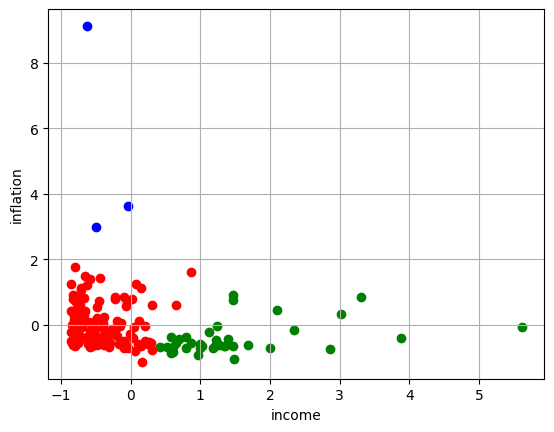

In [18]:
df_clustered_1 = df_clustered[df_clustered.tipePenghasilan == 0]
df_clustered_2 = df_clustered[df_clustered.tipePenghasilan == 1]
df_clustered_3 = df_clustered[df_clustered.tipePenghasilan == 2]

plt.scatter(
  df_clustered_1['income'],
  df_clustered_1['inflation'],
  c = 'green'
)
plt.scatter(
  df_clustered_2['income'],
  df_clustered_2['inflation'],
  c = 'red'
)
plt.scatter(
  df_clustered_3['income'],
  df_clustered_3['inflation'],
  c = 'blue'
)

plt.xlabel('income')
plt.ylabel('inflation')

plt.grid()